# Python QR Code encoder/decoder

In this code, we create a QR code for a URL link and then decode that. We also perform a little experiment on the error correction parameter of a QR code. 
We use the *qrcode* module for encoding a QR code and *pyzbar* for decoding it. *IPython.display* and *PIL* libraries were also used for handling QR code images.

 First, we create an empty (without data) QR code using the QRCode method. here, we set the error correction parameter to the "qrcode.constants.ERROR_CORRECT_L" (the last L stands for Low), which means in case of a data loss, only 7% of the data stored in the QR code can be restored. other parameters are related to storage capacity, size, and border.
Then we add data (the link) to the QR code.


In [62]:
import qrcode
from IPython.display import display
from PIL import Image
from pyzbar.pyzbar import decode
link='https://t.me/Dayana_Docs'
qr=qrcode.QRCode(version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=1,)
qr.add_data(link)
img=qr.make_image()
img.save('Dayana_Docs.png')

Here we display it:

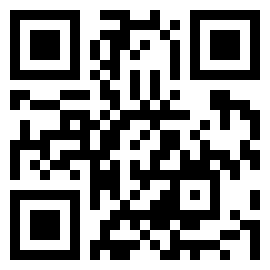

In [63]:
qr1=Image.open('Dayana_Docs.png')
display(qr1)

And now we decode the image using the *decode* function from pyzbar. then, the data stored in the QR code is printed properly. which is the same as the link we stored in the QR code.

In [65]:
data = decode(qr1)
#data is a list containing one tuple, the first element of which has the stored data as bytes
#so we use str() function to convert that to strings
print(str(data[0][0],"utf-8"))

https://t.me/Dayana_Docs


Now we simulate a data loss by manually adding the Dayana logo to the center of the QR code. Here is the modified image:

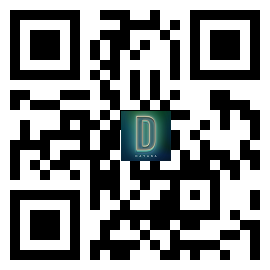

In [66]:
qr12=Image.open('Dayana_Docs-edited.png')
display(qr12)

Now we try to decode this one, which is unsuccessful.

In [67]:
data = decode(qr12)
if len(data)!=0:
    print(str(data[0][0],"utf-8"))
else:
    print("not decoded")

not decoded


So, we set a higher error correction value. The "ERROR_CORRECT_H" means that up to 30% of lost data can be restored.

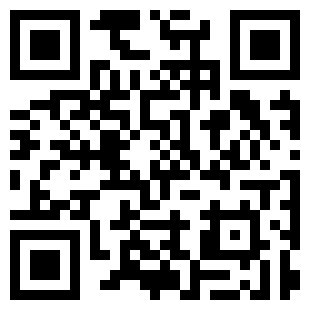

In [68]:
qr=qrcode.QRCode(version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=1,)
qr.add_data(link)
img=qr.make_image()
img.save('Dayana_Docs-2.png')
qr2=Image.open('Dayana_Docs-2.png')
display(qr2)

Again, we modify the code manually with the same logo.

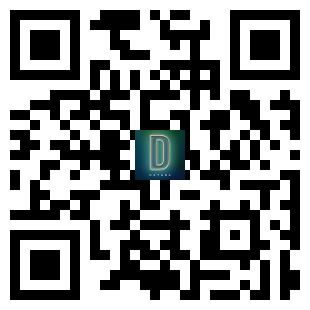

In [71]:
qr22=Image.open('Dayana_Docs-2-edited.png')
display(qr22)

Decoding the new image shows that increasing the error correction parameter works.

In [72]:
data = decode(qr22)
if len(data)!=0:
    print(str(data[0][0],"utf-8"))
else:
    print("not decoded")

https://t.me/Dayana_Docs
